<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1/blob/main/Bostonhousingproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
train=pd.read_csv("train.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)
# data.columns = [x.lower() for x in data.columns] #would also suffice
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


Exploring  missing values

In [7]:
# Check for missing values in each column
missing_values = train.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate percentage of missing values for each column
missing_percentage = (missing_values / len(train)) * 100

# Combine the missing values and percentages into a DataFrame for analysis
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Sort the DataFrame by percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

print("Columns with missing values and their percentages:")
print(missing_info)

Columns with missing values and their percentages:
              Missing Values  Percentage
poolqc                  1453   99.520548
miscfeature             1406   96.301370
alley                   1369   93.767123
fence                   1179   80.753425
masvnrtype               872   59.726027
fireplacequ              690   47.260274
lotfrontage              259   17.739726
garagetype                81    5.547945
garageyrblt               81    5.547945
garagefinish              81    5.547945
garagequal                81    5.547945
garagecond                81    5.547945
bsmtfintype2              38    2.602740
bsmtexposure              38    2.602740
bsmtfintype1              37    2.534247
bsmtcond                  37    2.534247
bsmtqual                  37    2.534247
masvnrarea                 8    0.547945
electrical                 1    0.068493


Explore all the categorical variables

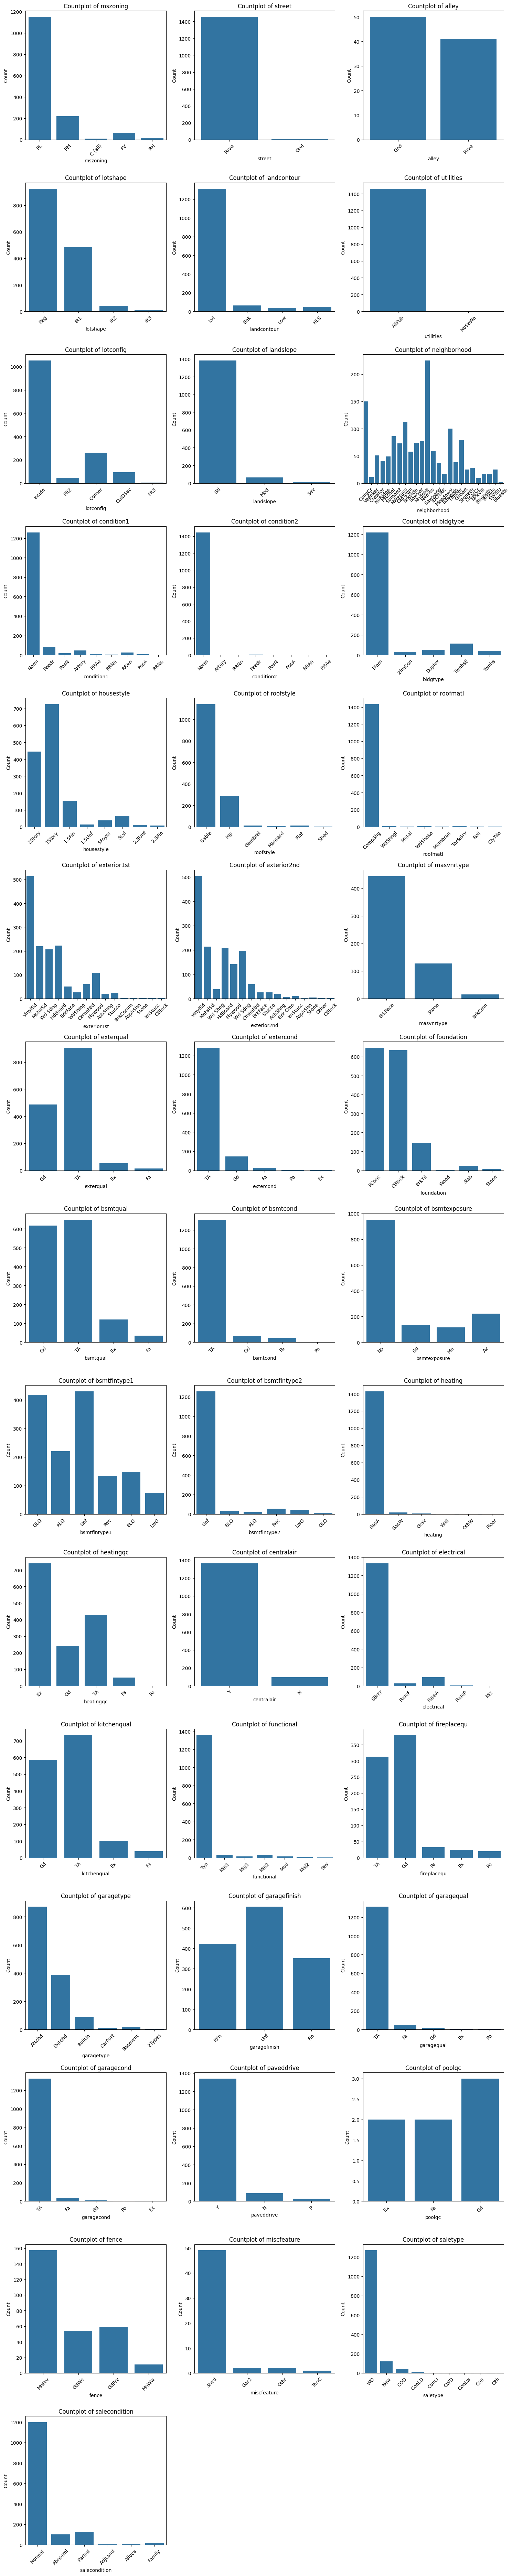

In [8]:
# Select columns with non-numeric data types
categorical_columns = train.select_dtypes(include=['object']).columns

# Set the number of columns per row in the plot grid
cols_per_row = 3

# Calculate the number of rows needed for the plot grid
num_rows = (len(categorical_columns) + cols_per_row - 1) // cols_per_row

# Create subplots for each categorical variable
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=train, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Exploring numerical variables

In [9]:
# Get summary statistics for numerical variables
numerical_summary = train.describe()

# Display the summary statistics
print(numerical_summary)

                id   mssubclass  lotfrontage        lotarea  overallqual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       overallcond    yearbuilt  yearremodadd   masvnrarea   bsmtfinsf1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [10]:
# Count missing values in numerical variables
missing_numerical = train.select_dtypes(include=[np.number]).isnull().sum()
print(missing_numerical)

id                 0
mssubclass         0
lotfrontage      259
lotarea            0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
masvnrarea         8
bsmtfinsf1         0
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
1stflrsf           0
2ndflrsf           0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       0
bsmthalfbath       0
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
totrmsabvgrd       0
fireplaces         0
garageyrblt       81
garagecars         0
garagearea         0
wooddecksf         0
openporchsf        0
enclosedporch      0
3ssnporch          0
screenporch        0
poolarea           0
miscval            0
mosold             0
yrsold             0
saleprice          0
dtype: int64


In [12]:
# Drop rows with any missing values
train_cleaned_rows = train.dropna()

# Drop columns with any missing values
train_cleaned_columns = train.dropna(axis=1)

handling missing values

In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
#Imputation
# Fill missing values with mean of each column
# List of columns to apply mean imputation
columns_to_impute = ['LotFrontage', 'LotArea', 'MiscVal']  # Specify columns as needed

# Fill missing values with mean for specified columns
for column in columns_to_impute:
    train[column].fillna(train[column].mean(), inplace=True)

In [21]:
# Fill missing values with median of each column
# List of columns to apply median imputation
columns_to_impute = ['LotFrontage', 'LotArea', 'MiscVal']  # Specify columns as needed

# Fill missing values with median for specified columns
for column in columns_to_impute:
    train[column].fillna(train[column].median(), inplace=True)

In [22]:
# Fill missing values with mode of each column
train_imputed_mode = train.fillna(train.mode().iloc[0])

In [26]:
# Drop rows with missing values
cleaned_data = train.dropna()

In [27]:
# Impute missing values with mean for numerical columns

# Identify numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with mean for numerical columns
for column in numerical_columns:
    train[column].fillna(train[column].mean(), inplace=True)

In [28]:
# Create a new DataFrame with missing values imputed
train_imputed = train.copy()
for column in numerical_columns:
    train_imputed[column].fillna(train_imputed[column].mean(), inplace=True)

In [29]:
#Impute missing values with mode for categorical columns
# Identify categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Fill missing values with mode for categorical columns
for column in categorical_columns:
    train[column].fillna(train[column].mode().iloc[0], inplace=True)

In [30]:
# Create a new DataFrame with missing values imputed
train_imputed = train.copy()
for column in categorical_columns:
    train_imputed[column].fillna(train_imputed[column].mode().iloc[0], inplace=True)

In [35]:
# Count missing values in numerical variables
missing_numerical = train.select_dtypes(include=[np.number]).isnull().sum()
print(missing_numerical)

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


Explore the relationship of these continous variables with selling price

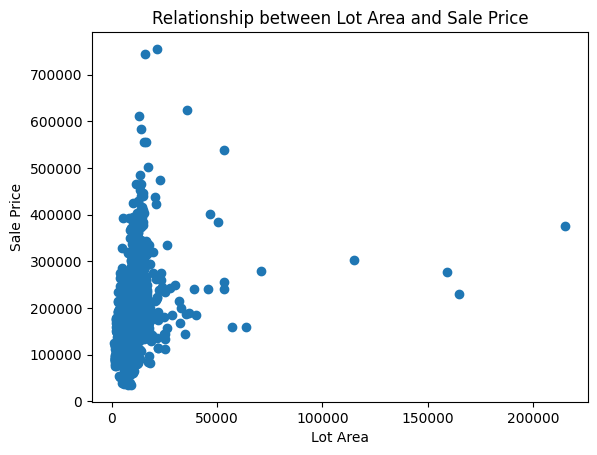

In [37]:
#Plotting LotArea against SalePrice
plt.scatter(train['LotArea'], train['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Relationship between Lot Area and Sale Price')
plt.show()

In [38]:
#Correlation Analysis

correlation = train[['LotArea', 'OverallQual', 'YearBuilt', 'SalePrice']].corr()
print(correlation)

              LotArea  OverallQual  YearBuilt  SalePrice
LotArea      1.000000     0.105806   0.014228   0.263843
OverallQual  0.105806     1.000000   0.572323   0.790982
YearBuilt    0.014228     0.572323   1.000000   0.522897
SalePrice    0.263843     0.790982   0.522897   1.000000


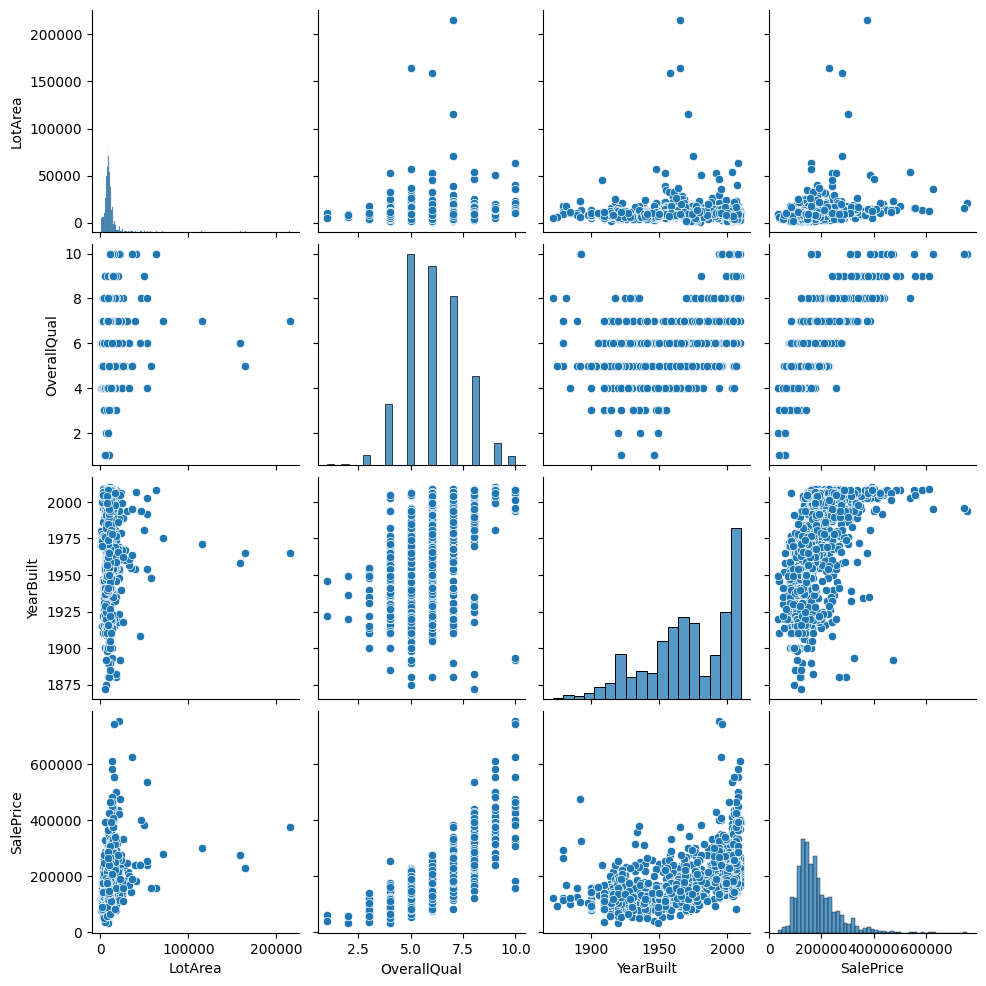

In [39]:
# Pairplot of LotArea, OverallQual, YearBuilt, and SalePrice
sns.pairplot(train[['LotArea', 'OverallQual', 'YearBuilt', 'SalePrice']]) #To identify potential interactions or multicollinearity.
plt.show()

In [44]:
#Regression Analysis
#Simple Linear Regression for LotArea and SalePrice
X = train[['LotArea']]  # Feature matrix
y = train['SalePrice']  # Target variable

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 158836.1518968766
Coefficient: [2.09997195]


In [47]:
#Multiple Linear Regression for LotArea, OverallQual, and YearBuilt
X = sm.add_constant(train[['LotArea', 'OverallQual', 'YearBuilt']])
y = train['SalePrice']

model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Display summary statistics

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     975.2
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        20:20:33   Log-Likelihood:                -17740.
No. Observations:                1460   AIC:                         3.549e+04
Df Residuals:                    1456   BIC:                         3.551e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.898e+05   9.22e+04     -7.483      

In [48]:
# Robust regression
# Define independent variables (X) and dependent variable (y)
X = sm.add_constant(train[['LotArea', 'OverallQual', 'YearBuilt']])
y = train['SalePrice']

# Fit Huber regression model
model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results = model.fit()

# Print summary statistics
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1456
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 07 May 2024                                         
Time:                        20:23:48                                         
No. Iterations:                     6                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.091e+05   6.75e+04    -11.988      

In [69]:
y_true = train['SalePrice']  # Replace 'SalePrice' with the actual column name of your target variable
y_pred = train['LotArea']


In [79]:
# Model Evaluation


In [72]:
#Calculate R-squared
r_squared = r2_score(y_true, y_pred)
print('R-squared:', r_squared)

R-squared: -4.553675780154008


In [73]:
#Calculate adjusted R-squared
n = len(y_true)
p = X.shape[1] - 1  # Number of predictors (excluding intercept)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print('Adjusted R-squared:', adjusted_r_squared)

Adjusted R-squared: -4.565118793437293


In [74]:
#Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 35025859017.006165


In [75]:
#Calculate RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 187151.96770807984


In [76]:
# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 170404.3678082192


In [78]:
#Residual analysis
residuals = y_true - y_pred
print(residuals)

0       200050
1       171900
2       212250
3       130450
4       235740
         ...  
1455    167083
1456    196825
1457    257458
1458    132408
1459    137563
Length: 1460, dtype: int64


Explore the relationship between the discrete variables and selling price

In [84]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [85]:
train['mssubclass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [89]:
print(train['mszoning'].value_counts())

mszoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


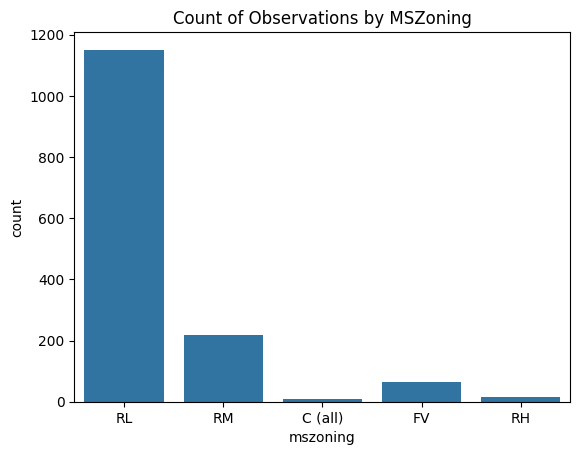

In [92]:
#Count plot for 'MSZoning'
sns.countplot(x='mszoning', data=train)
plt.title('Count of Observations by MSZoning')
plt.show()

In [93]:
discrete = train['mszoning']

In [95]:
discrete = train.select_dtypes(include=['int64', 'float64']).columns

In [96]:
train[discrete].head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [100]:
def plot():
    for var in discrete:

        if not var=='mssubclass'or not var=='3ssnporch':
            train.groupby(var)['saleprice'].mean().plot.bar(color='tan')
            plt.ylabel('selling price of house')
            plt.title(var)
            plt.grid(True)
            plt.show()

Outliers

In [102]:
#Identify outliers
Q1 = train['saleprice'].quantile(0.25)
Q3 = train['saleprice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['saleprice'] < lower_bound) | (train['saleprice'] > upper_bound)]


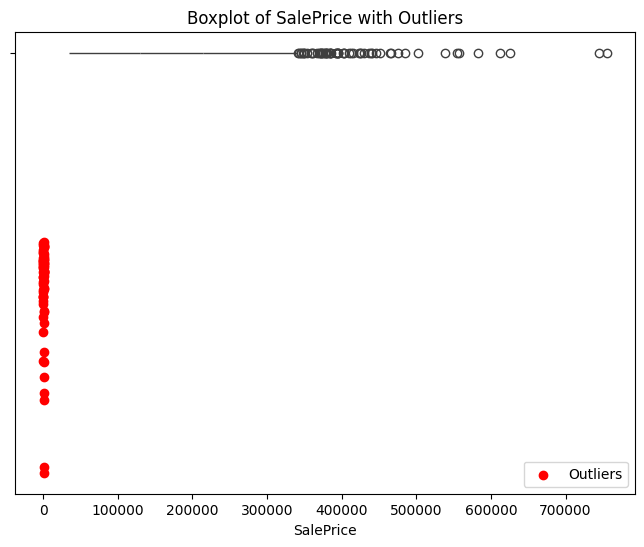

In [103]:
#Plot outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['saleprice'])
plt.scatter(outliers.index, outliers['saleprice'], color='red', label='Outliers')
plt.title('Boxplot of SalePrice with Outliers')
plt.xlabel('SalePrice')
plt.legend()
plt.show()

In [104]:
# Univariate
#Calculate summary statistics for a numerical variable 'SalePrice'
print("Mean:", train['saleprice'].mean())
print("Median:", train['saleprice'].median())
print("Standard Deviation:", train['saleprice'].std())
print("Minimum:", train['saleprice'].min())
print("Maximum:", train['saleprice'].max())

Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288662
Minimum: 34900
Maximum: 755000


Text(0.5, 0, 'SalePrice')

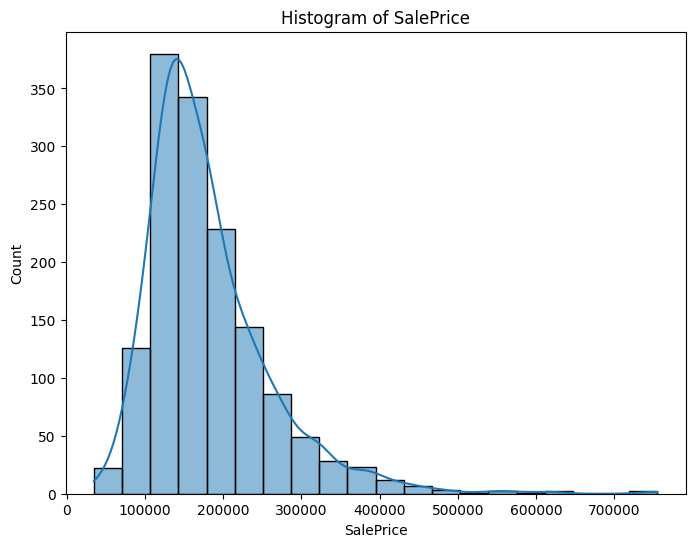

In [105]:
#Histogram of 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(train['saleprice'], bins=20, kde=True) # To understand its shape and frequency.
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')

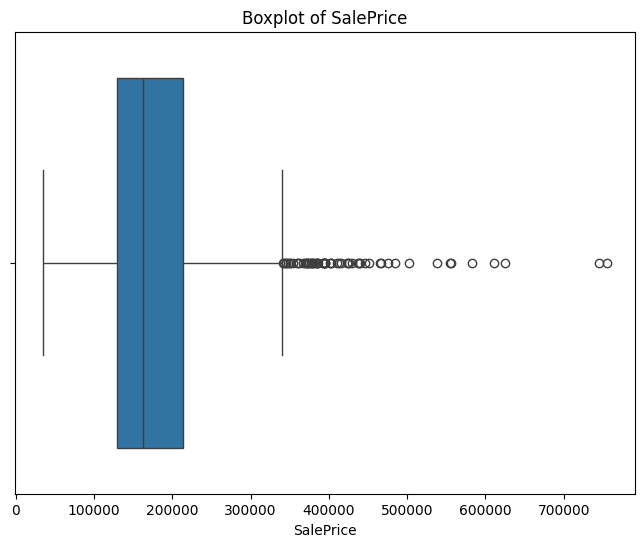

In [106]:
# Box plot of 'SalePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['saleprice']) #To visualize the central tendency, spread, and identify potential outliers in the variable.
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

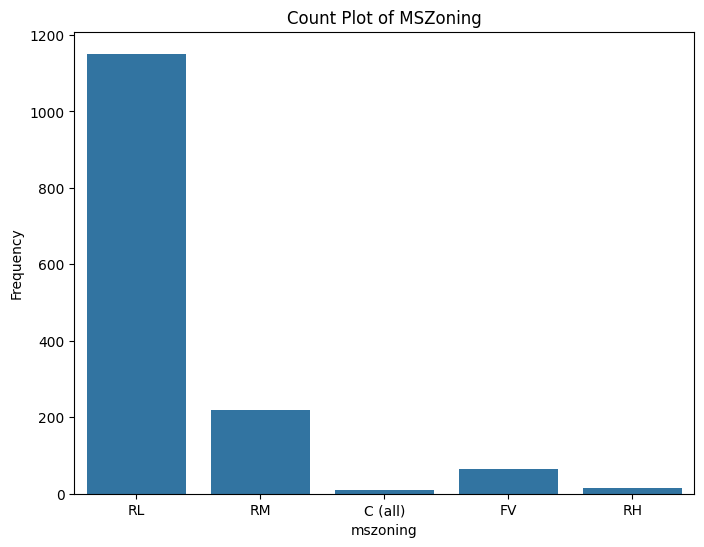

In [108]:
#Count plot of 'MSZoning'
plt.figure(figsize=(8, 6))
sns.countplot(x='mszoning', data=train) # For categorical variables, create a count plot to visualize the frequency of each category.
plt.title('Count Plot of MSZoning')
plt.xlabel('mszoning')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Multivariate

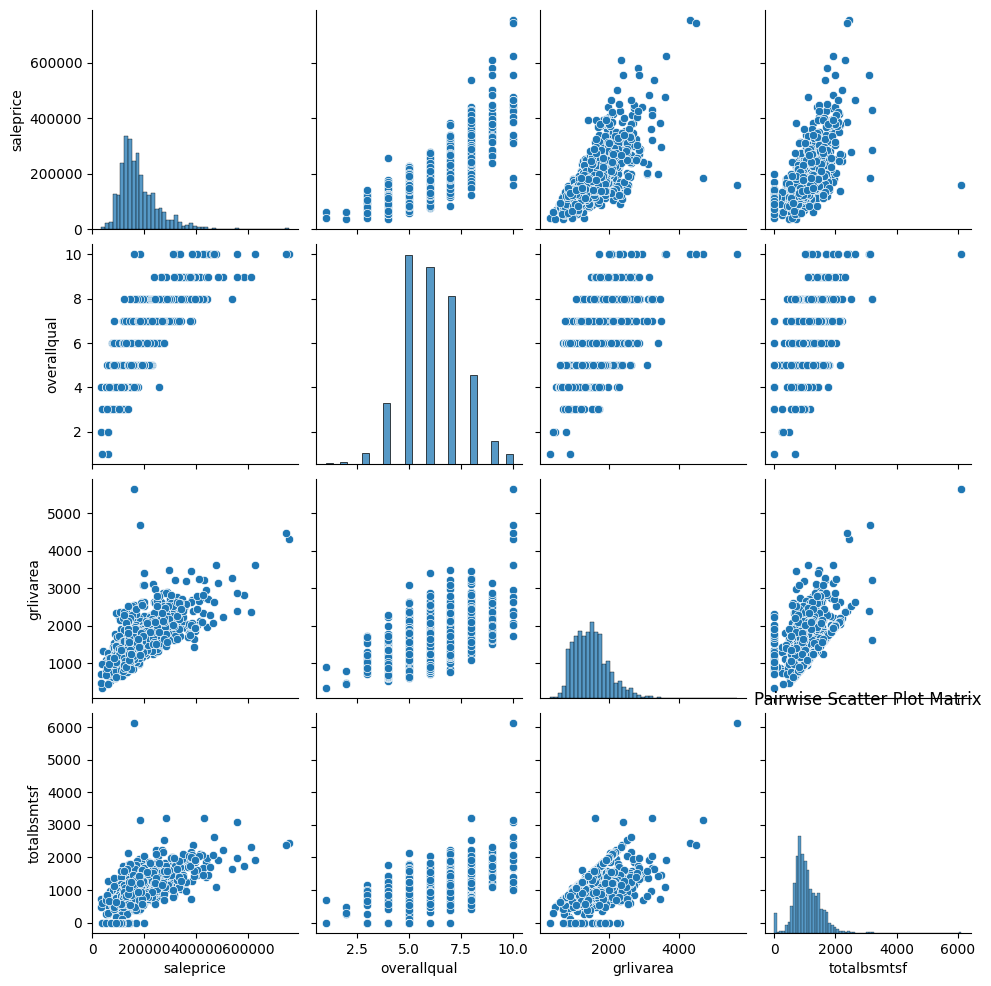

In [110]:
# Scatter plot matrix of numerical variables
sns.pairplot(train[['saleprice', 'overallqual', 'grlivarea', 'totalbsmtsf']])
plt.title('Pairwise Scatter Plot Matrix')
plt.show()

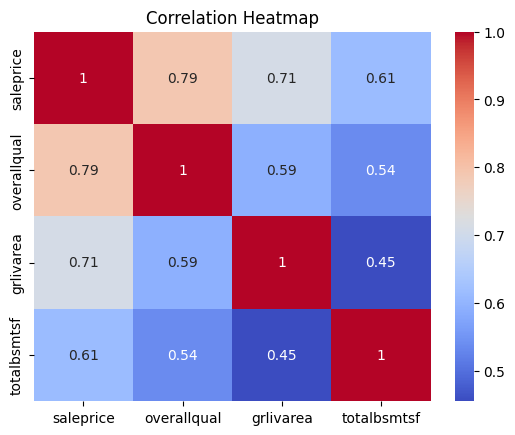

In [113]:
# Correlation heatmap of numerical variables
corr_matrix = train[['saleprice', 'overallqual', 'grlivarea', 'totalbsmtsf']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

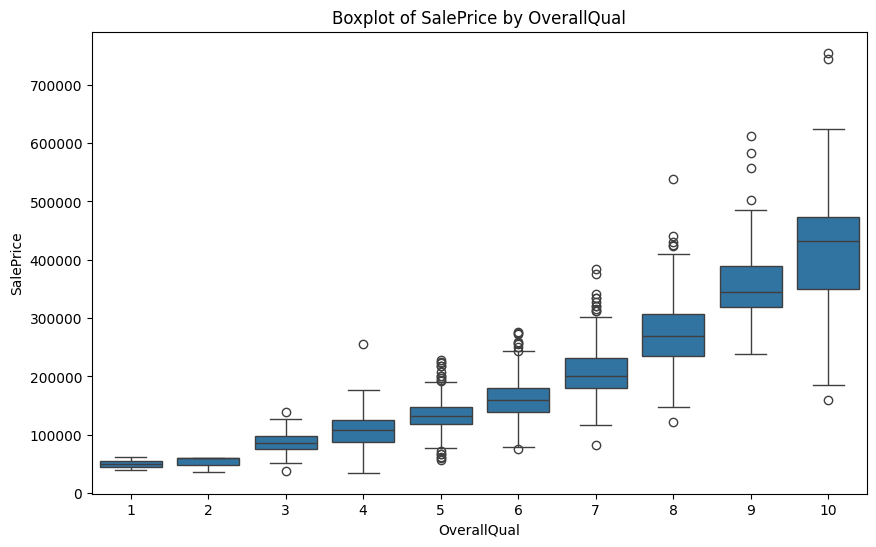

In [114]:
#Box plot of 'SalePrice' grouped by 'OverallQual'
plt.figure(figsize=(10, 6))
sns.boxplot(x='overallqual', y='saleprice', data=train) #To visualize the distribution of a numerical variable across different categories of a categorical variable.
plt.title('Boxplot of SalePrice by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

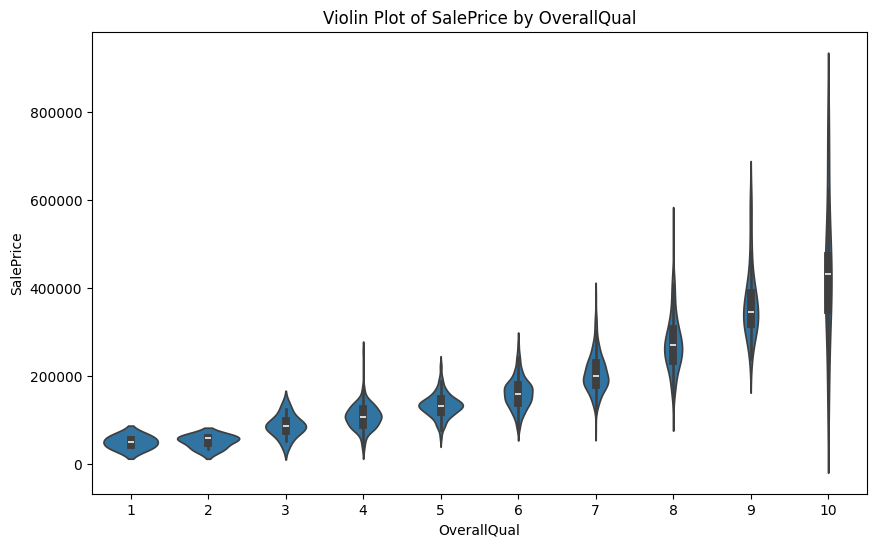

In [115]:
#Violin plot of 'SalePrice' grouped by 'OverallQual'
plt.figure(figsize=(10, 6))
sns.violinplot(x='overallqual', y='saleprice', data=train)
plt.title('Violin Plot of SalePrice by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

Removing the outliers

In [117]:
# Calculate the Interquartile Range (IQR)
Q1 = train['saleprice'].quantile(0.25)
Q3 = train['saleprice'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Outliers
train_no_outliers = train[(train['saleprice'] >= lower_bound) & (train['saleprice'] <= upper_bound)]

Feature Selection - PCA

In [125]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (dimensions)
X_pca = pca.fit_transform(X_scaled)

Regression models

In [126]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -689771.6386978963
Coefficients: [0.00000000e+00 1.49385142e+00 4.04379101e+04 3.08602768e+02]


In [130]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)  # Specify the degree of the polynomial
X_poly = poly_features.fit_transform(X)

# Create a Linear Regression model
model = LinearRegression()